In [7]:
from functions import *

# Model for 6 characters

## Plots of all the character appearances in the images dataset

### train data

In [2]:
path = "data/6_CHARACTERS"
df_train = count_characters_in_filenames(path)

Text(0, 0.5, 'Number of appearances')

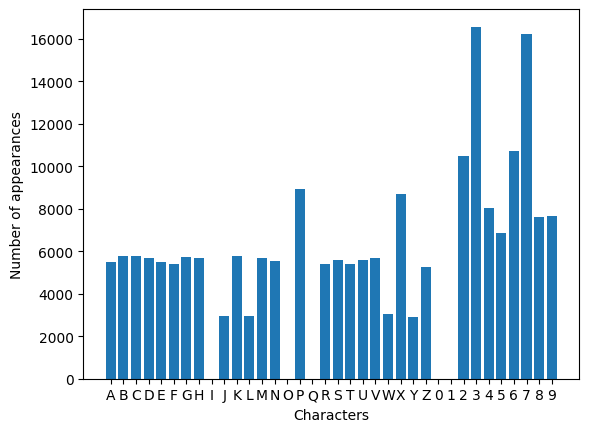

In [3]:
plt.bar(df_train.index, df_train[0])

plt.xlabel('Characters')
plt.ylabel("Number of appearances")

### test data

In [4]:
df_test = count_characters_in_filenames("data/6_CHARACTERS_test")

Text(0, 0.5, 'Number of appearances')

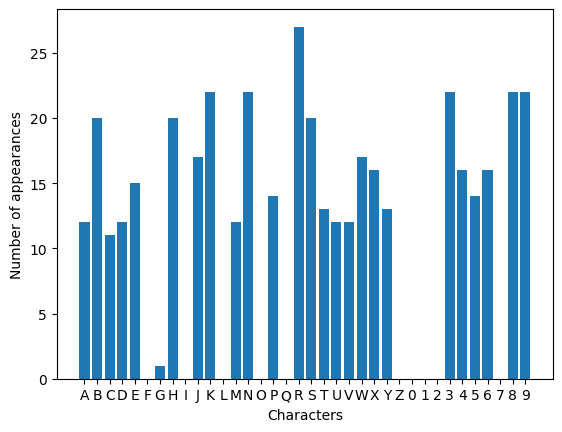

In [ ]:
plt.bar(df_test.index, df_test[0])

plt.xlabel('Characters')
plt.ylabel("Number of appearances")

## Export the data into numpy arrays

In [ ]:
X,Y,name = preprocess(file_path="data/6_CHARACTERS", size_image=(75, 250, 1), ncharacter_per_image=6, ncharacter_total=36) 

# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split

# split the 1070 samples where 7000 samples will be used for training purpose
X_train, Y_train = X[7000:], Y[:, 7000:]
X_test, Y_test = X[:7000], Y[:, :7000]
name_train, name_test = name[7000:], name[:7000]

## Creation of the model

In [3]:
# Create model
model = create_model(size_image=(75, 250, 1), n_characters_per_image=6, n_characters_total=36)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 75, 250,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 75, 250,   │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 38, 125,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 38, 125,   │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 19, 63,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 19, 63,    │      9,248 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 19, 63,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 10, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 10240)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    655,424 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │    655,424 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │    655,424 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │    655,424 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │    655,424 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │    655,424 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_10[0][0]  

 Total params: 3,960,760 (15.11 MB)

 Trainable params: 3,960,696 (15.11 MB)

 Non-trainable params: 64 (256.00 B)

### to train all the data 

In [4]:
#Applying the model
hist = model.fit(X_train, [Y_train[0], Y_train[1], Y_train[2], Y_train[3], Y_train[4], Y_train[5]], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 165s 230ms/step - dense_11_accuracy: 0.1107 - dense_11_loss: 3.2312 - dense_1_accuracy: 0.1507 - dense_1_loss: 3.0031 - dense_3_accuracy: 0.1159 - dense_3_loss: 3.2875 - dense_5_accuracy: 0.1242 - dense_5_loss: 3.2377 - dense_7_accuracy: 0.0842 - dense_7_loss: 3.3781 - dense_9_accuracy: 0.1022 - dense_9_loss: 3.2607 - loss: 19.3984 - val_dense_11_accuracy: 0.4927 - val_dense_11_loss: 1.9151 - val_dense_1_accuracy: 1.7989e-04 - val_dense_1_loss: 11.8557 - val_dense_3_accuracy: 0.5145 - val_dense_3_loss: 1.9315 - val_dense_5_accuracy: 0.5307 - val_dense_5_loss: 1.8022 - val_dense_7_accuracy: 0.3697 - val_dense_7_loss: 2.3780 - val_dense_9_accuracy: 0.5373 - val_dense_9_loss: 1.8275 - val_loss: 21.7082
Epoch 2/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 159s 229ms/step - dense_11_accuracy: 0.3474 - dense_11_loss: 2.1126 - dense_1_accuracy: 0.4127 - dense_1_loss: 1.7092 - dense_3_accuracy: 0.3482 - dense_3_loss: 2.1054 - dense_5_accuracy: 0.3767 - dense_5_loss: 

### to save the model

In [ ]:
# Re-sauvegarder le modèle dans le format .h5
model.save("model/model.keras")
model.save("model/model.h5")

### load the model

In [4]:
from keras.models import load_model
# Charger le modèle sauvegardé au format `.keras`
model = load_model("model/model.h5")

## Plot

### plot accuracy of the model of each character to predict into an single image

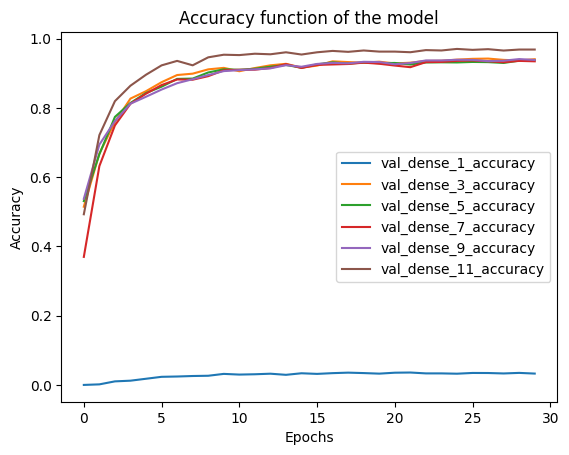

In [9]:
# graph of accuracy vs epochs
for label in ["val_dense_1_accuracy", "val_dense_3_accuracy", "val_dense_5_accuracy", "val_dense_7_accuracy", "val_dense_9_accuracy", "val_dense_11_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy function of the model")
plt.show()

### plot the loss function

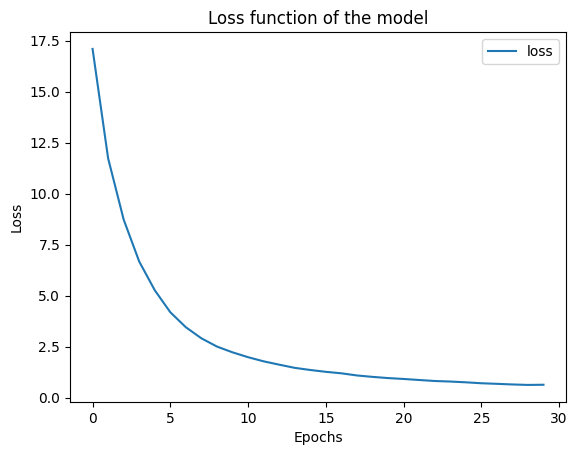

In [10]:
# graph of loss vs epochs
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss function of the model")
plt.show()

## checking accuracy on data

### Accuracy on data train

In [12]:
# Loss on training set
preds = model.evaluate(X_train, [Y_train[0], Y_train[1], Y_train[2], Y_train[3], Y_train[4], Y_train[5]])
print ("Loss on training set= " + str(preds[0]))

869/869 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - dense_11_accuracy: 0.9985 - dense_11_loss: 0.0076 - dense_1_accuracy: 0.9791 - dense_1_loss: 1.3995 - dense_3_accuracy: 0.9976 - dense_3_loss: 0.0108 - dense_5_accuracy: 0.9980 - dense_5_loss: 0.0110 - dense_7_accuracy: 0.9963 - dense_7_loss: 0.0153 - dense_9_accuracy: 0.9969 - dense_9_loss: 0.0141 - loss: 1.4583
Loss on training set= 13.64040756225586


### Accuracy on test data

In [ ]:
# Loss on test set
preds = model.evaluate(X_test, [Y_test[0], Y_test[1], Y_test[2], Y_test[3], Y_test[4], Y_test[5]])
print ("Loss on testing set= " + str(preds[0]))

869/869 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - dense_11_accuracy: 1.0000 - dense_11_loss: 0.0000e+00 - dense_1_accuracy: 1.0000 - dense_1_loss: 0.0000e+00 - dense_3_accuracy: 1.0000 - dense_3_loss: 0.0000e+00 - dense_5_accuracy: 1.0000 - dense_5_loss: 0.0000e+00 - dense_7_accuracy: 1.0000 - dense_7_loss: 0.0000e+00 - dense_9_accuracy: 1.0000 - dense_9_loss: 0.0000e+00 - loss: 0.0000e+00
Loss on testing set= 0.0


## checking accuracy on test data

In [5]:
res = model.predict(X_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step


In [ ]:
character = string.ascii_uppercase + "0123456789"
count = 0
stacked_predictions = np.stack(res, axis=1)
for i in range(0, stacked_predictions.shape[0]):
    str2 = name_test[i]
    result = stacked_predictions[i]
    k_ind = []
    probs = []
    for j in result:
        k_ind.append(np.argmax(j)) #adds the index of the char found in captcha
    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    str1 = capt
    
    for char1, char2 in zip(str1, str2):
        if char1 == char2:
            count += 1

In [15]:
print( f"Accuracy on the test data is {count/(len(name_test)*6)}" ) 

Accuracy on the test data is 0.8134047619047619


In [16]:
X1, Y1, name1 = preprocess(file_path="data/6_CHARACTERS_test", size_image=(75, 250, 1), ncharacter_per_image=6, ncharacter_total=36) 
res = model.predict(X1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [20]:
stacked_predictions.shape[0]

70

In [21]:

character = string.ascii_uppercase + "0123456789"
count = 0
stacked_predictions = np.stack(res, axis=1)
for i in range(0, stacked_predictions.shape[0]):
    str2 = name1[i]
    result = stacked_predictions[i]
    k_ind = []
    probs = []
    for j in result:
        k_ind.append(np.argmax(j)) #adds the index of the char found in captcha
    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    str1 = capt
    
    for char1, char2 in zip(str1, str2):
        if char1 == char2:
            count += 1

In [22]:
print( f"Accuracy on the test data is {count/(len(name1)*6)}" ) 

Accuracy on the test data is 0.30952380952380953
